# 1. Importing Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
%matplotlib inline

# 2. Loading our Data

In [2]:
train = pd.read_csv("loan_train.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
test = pd.read_csv("loan_test.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
train_original=train.copy()
test_original=test.copy()

# 3. Understanding Our Data

In [5]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
print("Column Names of Training Data:",train.columns.tolist())
print()
print("Number of Columns:",len(train.columns))

Column Names of Training Data: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

Number of Columns: 13


In [7]:
print("Column Names of Test Data:",test.columns.tolist())
print()
print("Number of Columns:",len(test.columns))

Column Names of Test Data: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']

Number of Columns: 12


In [8]:
print(train.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [9]:
train.shape

(614, 13)

In [10]:
test.shape

(367, 12)

In [11]:
# Number of loans approved and unapproved
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [12]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [13]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [14]:
# To get output in percentage form, use normalize=True
train['Married'].value_counts(normalize=True)

Yes    0.651391
No     0.348609
Name: Married, dtype: float64

In [15]:
train['Property_Area'].value_counts(normalize=True)

Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64

In [16]:
train['Self_Employed'].value_counts(normalize=True)

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

In [17]:
train['Education'].value_counts(normalize=True)

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

# 4. Visualizing Raw Data

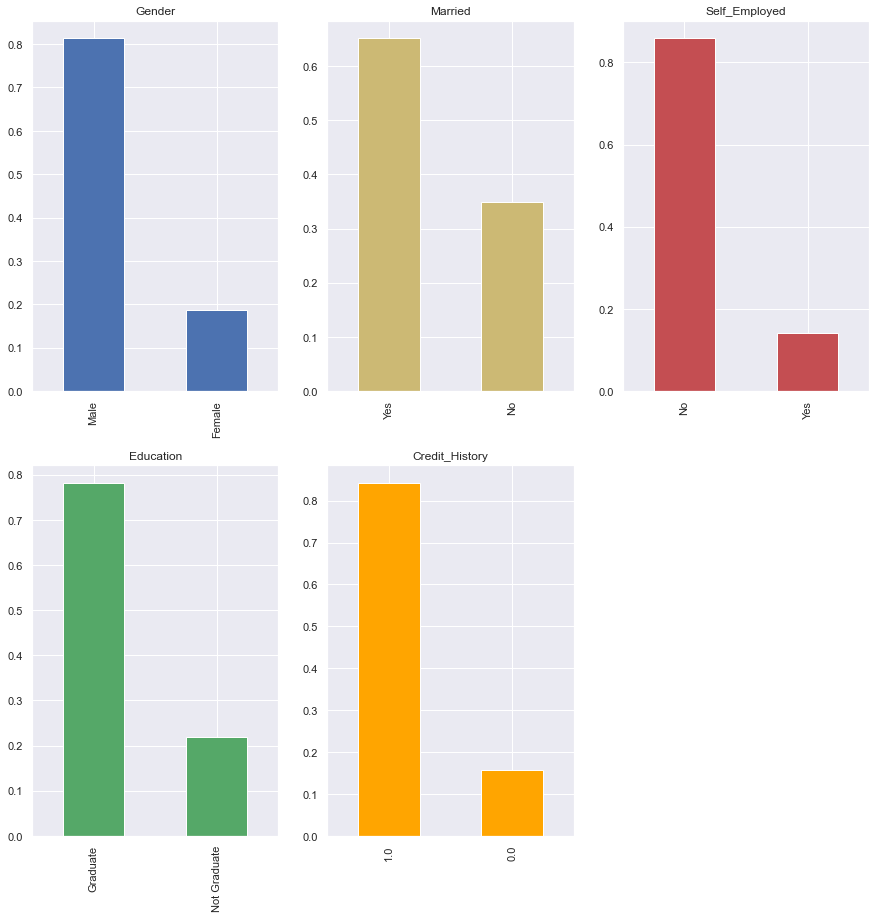

In [18]:
# categorical variables
plt.subplot(2,3,1)
train['Gender'].value_counts(normalize=True).plot.bar()
plt.title('Gender')
plt.subplot(2,3,2)
train['Married'].value_counts(normalize=True).plot(kind='bar',color='y',figsize=(15,15))
plt.title('Married')
plt.subplot(2,3,3)
train['Self_Employed'].value_counts(normalize=True).plot(kind='bar',color='r')
plt.title('Self_Employed')

plt.subplot(2,3,4)
train['Education'].value_counts(normalize=True).plot(kind='bar',color='g')
plt.title('Education')

plt.subplot(2,3,5)
train['Credit_History'].value_counts(normalize = True).plot(kind='bar',color='orange')
plt.title('Credit_History')
plt.show()


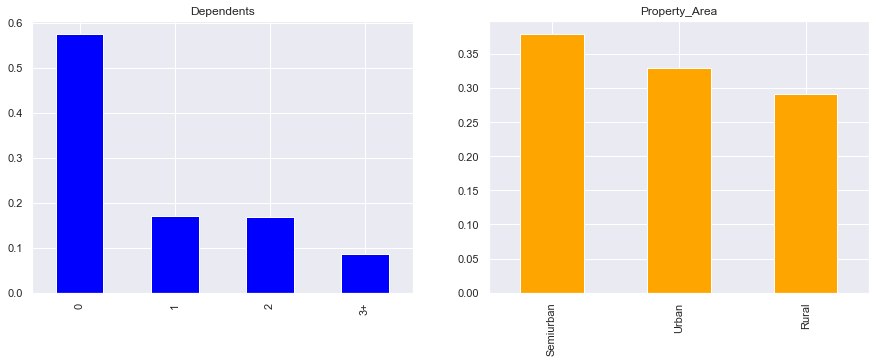

In [19]:
plt.subplot(1,2,1)
train['Dependents'].value_counts(normalize=True).plot(kind ='bar',figsize=(15,5), title= 'Dependents',color='blue')

plt.subplot(1,2,2)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area',color='orange')
plt.show()

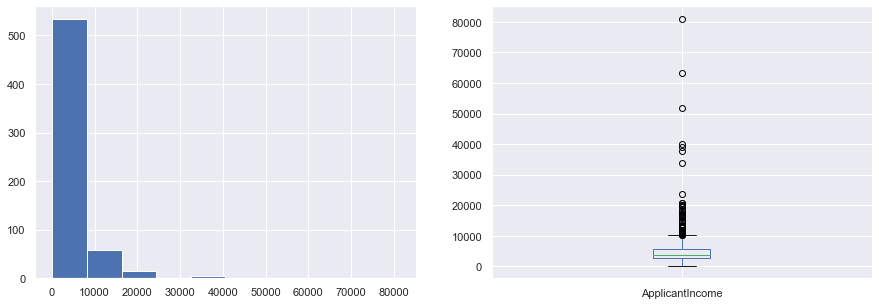

In [20]:
# Numerical Data
# Plotting Histogram and Boxplot 
plt.subplot(1,2,1)
plt.hist(train['ApplicantIncome'])
plt.subplot(1,2,2)
train['ApplicantIncome'].plot.box(figsize=(15,5))
plt.show()

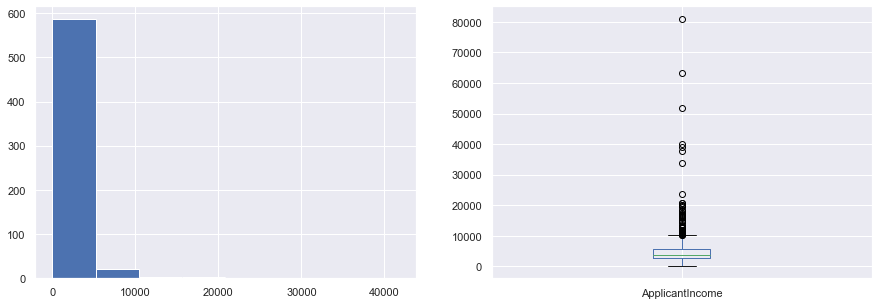

In [21]:
plt.subplot(1,2,1)
plt.hist(train['CoapplicantIncome'],bins=8)
plt.subplot(1,2,2)
train['ApplicantIncome'].plot.box(figsize=(15,5))
plt.show()

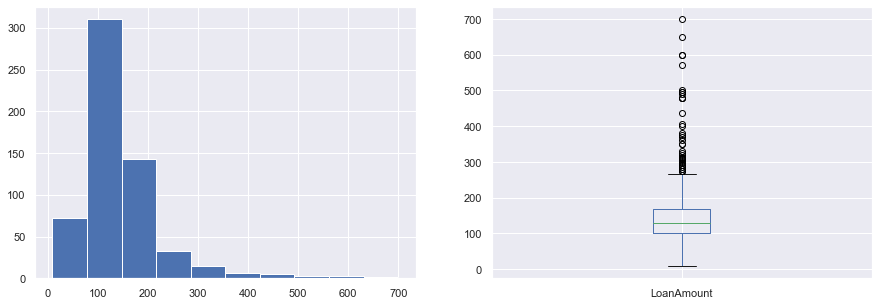

In [22]:
plt.subplot(1,2,1)
np.warnings.filterwarnings('ignore')
plt.hist(train['LoanAmount'])
plt.subplot(1,2,2)
train['LoanAmount'].plot.box(figsize=(15,5))
plt.show()

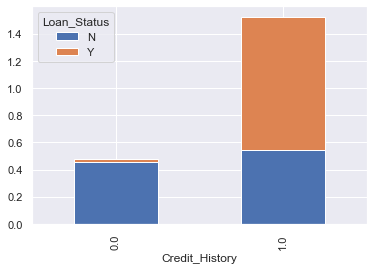

In [23]:
# Visualing relationship between categorical variables and loan_status using crosstab
pd.crosstab(train ['Credit_History'], train ['Loan_Status']).apply(lambda r: r/r.sum()).plot(kind='bar',stacked=True)
plt.show()

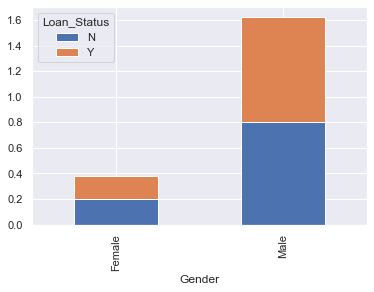

In [24]:

x = pd.crosstab(train ['Gender'], train ['Loan_Status']).apply(lambda r: r/r.sum()).plot(kind='bar',stacked=True)


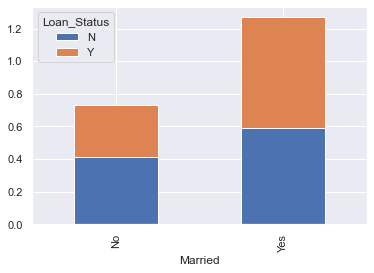

In [25]:
x = pd.crosstab(train ['Married'], train ['Loan_Status']).apply(lambda r: r/r.sum()).plot(kind='bar',stacked=True)

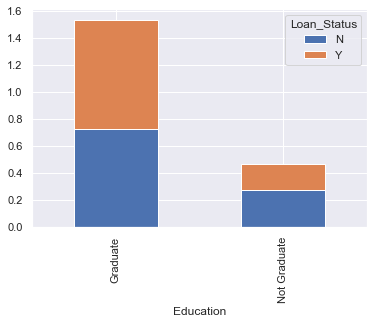

In [26]:
x = pd.crosstab(train ['Education'], train ['Loan_Status']).apply(lambda r: r/r.sum()).plot(kind='bar',stacked=True)

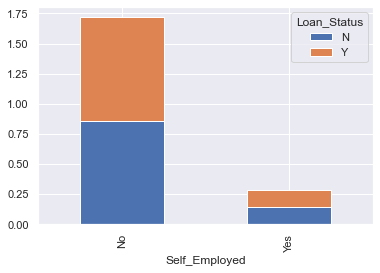

In [27]:
x = pd.crosstab(train ['Self_Employed'], train ['Loan_Status']).apply(lambda r: r/r.sum()).plot(kind='bar',stacked=True)

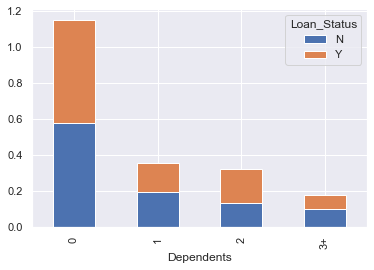

In [28]:
x = pd.crosstab(train ['Dependents'], train ['Loan_Status']).apply(lambda r: r/r.sum()).plot(kind='bar',stacked=True)

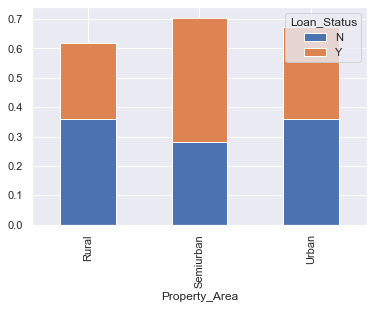

In [29]:
x = pd.crosstab(train ['Property_Area'], train ['Loan_Status']).apply(lambda r: r/r.sum()).plot(kind='bar',stacked=True)

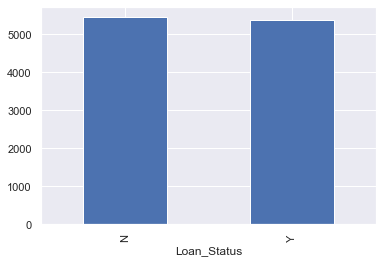

In [30]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.show()

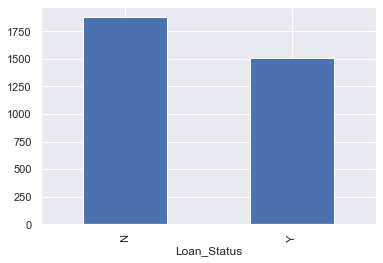

In [31]:
train.groupby('Loan_Status')['CoapplicantIncome'].mean().plot.bar()
plt.show()

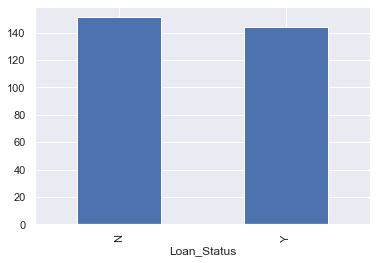

In [32]:
train.groupby('Loan_Status')['LoanAmount'].mean().plot.bar()
plt.show()

In [33]:
# Replacing N and Y with 0 and 1 so that we can view it in the correlation table
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


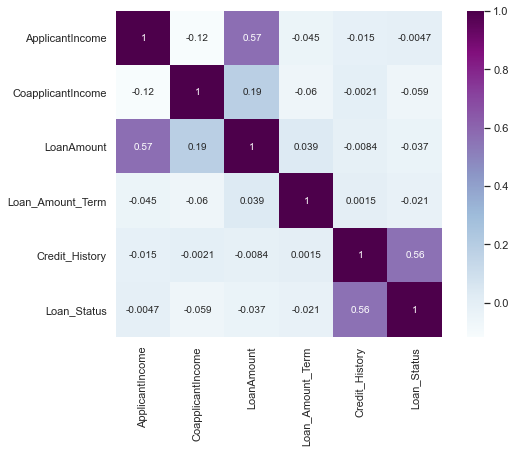

In [34]:
# Correlation Matrix
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=1, square=True, cmap = "BuPu",annot=True)

matrix

# 5. Dealing With Missing Values

In [35]:
# This statement checks whether a missing value exists
train.isna().any().any()
test.isna().any().any()

True

In [36]:
# Checking which columns have missing values
train.loc[:,train.isnull().any()].columns

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [37]:
test.loc[:,train.isnull().any()].columns

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [38]:
# Filling categorical missing values with their respective modes

for column in ['Gender','Married','Dependents','Self_Employed','Credit_History']:
    train[column].fillna(train[column].mode()[0],inplace=True)
    test[column].fillna(test[column].mode()[0],inplace=True)

In [39]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [40]:
# 360 is the most common and repeated value, hence replacing missing Loan_Amount_Term with 360
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)

In [41]:
# Replacing LoanAmount with median intead of mean since it has many outliers
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)


In [42]:
train.isna().any().any()

False

In [43]:
test.isna().any().any()

False

# 6. Dealing With Outliers

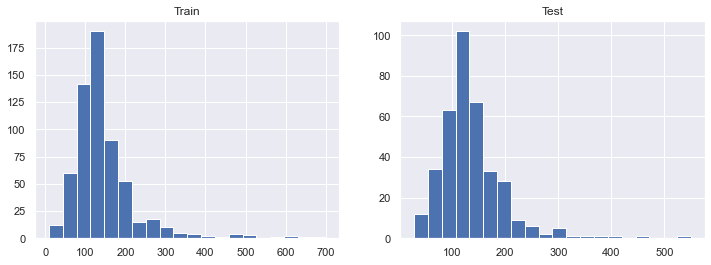

In [44]:
ax1 = plt.subplot(121)
train['LoanAmount'].hist(bins=20, figsize=(12,4))
ax1.set_title("Train")

ax2 = plt.subplot(122)
test['LoanAmount'].hist(bins=20)
ax2.set_title("Test")
plt.show()

In [45]:
# Removing skewness in LoanAmount variable by log transformation
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])

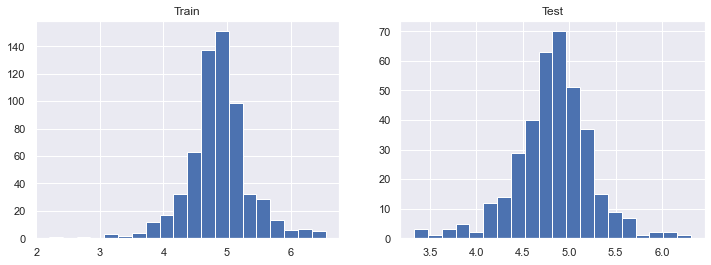

In [46]:
# after log transformation

ax1 = plt.subplot(121)
train['LoanAmount_log'].hist(bins=20, figsize=(12,4))
ax1.set_title("Train")

ax2 = plt.subplot(122)
test['LoanAmount_log'].hist(bins=20)
ax2.set_title("Test")
plt.show()

# 7. Model Building

In [47]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
sensitivity_score = recall_score
def specificity_score(y_true, y_pred):
    p, r, f, s = precision_recall_fscore_support(y_true, y_pred)
    return r[0]


In [48]:
# Drop Loan_ID since it has no effect on loan_status
train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

In [49]:
X = train.drop('Loan_Status', 1)
y = train.Loan_Status

In [50]:
# Used get_dummies to get all categorical data seperated in numerical form
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)
X.shape, train.shape, test.shape


((614, 21), (614, 22), (367, 21))

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("sensitivity:", sensitivity_score(y_test, y_pred))
print("specificity:", specificity_score(y_test, y_pred))

print("accuracy: {0:.5f}".format(accuracy_score(y_test, y_pred)))
print("precision: {0:.5f}".format(precision_score(y_test, y_pred)))
print("recall: {0:.5f}".format(recall_score(y_test, y_pred)))
print("f1 score: {0:.5f}".format(f1_score(y_test, y_pred)))

sensitivity: 0.972972972972973
specificity: 0.46511627906976744
accuracy: 0.83117
precision: 0.82443
recall: 0.97297
f1 score: 0.89256


In [52]:
lr.score(X_test,y_test)

0.8311688311688312

In [53]:
# Predicting on the test dataset
pred_test = lr.predict(test)

In [54]:
pred_test[:]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [55]:
# Using K-Folds

kf = KFold(n_splits=5, shuffle=True, random_state = 12)

def get_score(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [56]:
scores_l = []
scores_rf = []
scores_svm = []
scores_dt = []
scores_xgb = []

i=1

for train_index,test_index in kf.split(X):
    X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[test_index],y[train_index], y[test_index]
    scores_l.append(get_score(LogisticRegression(),X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators = 40),X_train, X_test, y_train, y_test))
    scores_svm.append(get_score(SVC(),X_train, X_test, y_train, y_test))
    scores_dt.append(get_score(DecisionTreeClassifier(),X_train, X_test, y_train, y_test))
    scores_xgb.append(get_score(XGBClassifier(),X_train, X_test, y_train, y_test))
    i = i+1


[01:08:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:08:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:08:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:08:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [57]:
# KFold for Logistic Regression
print("Logistic Regression")
print()
for a in range(1,i):
    print("K Fold ", a)
    print("Accuracy:",scores_l[a-1])
print("Mean Accuracy for Logistic Regression:",sum(scores_l)/len(scores_l))   

Logistic Regression

K Fold  1
Accuracy: 0.8211382113821138
K Fold  2
Accuracy: 0.7560975609756098
K Fold  3
Accuracy: 0.8211382113821138
K Fold  4
Accuracy: 0.7967479674796748
K Fold  5
Accuracy: 0.8278688524590164
Mean Accuracy for Logistic Regression: 0.8045981607357058


In [58]:
# KFold for Decision Tree
print("Decision Tree")
print()
for a in range(1,i):
    print("K Fold ", a)
    print("Accuracy:",scores_dt[a-1])
print("Mean Accuracy for Decision Tree:",sum(scores_dt)/len(scores_dt))   

Decision Tree

K Fold  1
Accuracy: 0.7073170731707317
K Fold  2
Accuracy: 0.6991869918699187
K Fold  3
Accuracy: 0.7154471544715447
K Fold  4
Accuracy: 0.6829268292682927
K Fold  5
Accuracy: 0.7213114754098361
Mean Accuracy for Decision Tree: 0.7052379048380648


In [59]:
# KFold for Random Forest
print("Random Forest")
print()
for a in range(1,i):
    print("K Fold ", a)
    print("Accuracy:",scores_rf[a-1])
print("Mean Accuracy for Random Forest:",sum(scores_rf)/len(scores_rf))   

Random Forest

K Fold  1
Accuracy: 0.7723577235772358
K Fold  2
Accuracy: 0.7804878048780488
K Fold  3
Accuracy: 0.7886178861788617
K Fold  4
Accuracy: 0.7479674796747967
K Fold  5
Accuracy: 0.7950819672131147
Mean Accuracy for Random Forest: 0.7769025723044115


In [60]:
# KFold for SVM
print("SVM")
print()
for a in range(1,i):
    print("K Fold ", a)
    print("Accuracy:",scores_svm[a-1])
print("Mean Accuracy for Decision Tree:",sum(scores_svm)/len(scores_svm))   

SVM

K Fold  1
Accuracy: 0.6910569105691057
K Fold  2
Accuracy: 0.6666666666666666
K Fold  3
Accuracy: 0.7073170731707317
K Fold  4
Accuracy: 0.6829268292682927
K Fold  5
Accuracy: 0.680327868852459
Mean Accuracy for Decision Tree: 0.6856590697054512


In [61]:
# KFold for XGBoost
print("XGBoost")
print()
for a in range(1,i):
    print("K Fold ", a)
    print("Accuracy:",scores_xgb[a-1])
print("Mean Accuracy for XGBoost:",sum(scores_xgb)/len(scores_xgb))   

XGBoost

K Fold  1
Accuracy: 0.7560975609756098
K Fold  2
Accuracy: 0.7154471544715447
K Fold  3
Accuracy: 0.7886178861788617
K Fold  4
Accuracy: 0.7398373983739838
K Fold  5
Accuracy: 0.7786885245901639
Mean Accuracy for XGBoost: 0.7557377049180328


In [62]:
rf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train,y_train)
feature_imp = pd.Series(rf.feature_importances_,index=train.columns[:21]).sort_values(ascending=False)
feature_imp

Credit_History             0.219571
ApplicantIncome            0.147241
Loan_Status                0.139335
LoanAmount                 0.136254
CoapplicantIncome          0.098676
Loan_Amount_Term           0.037835
Property_Area_Rural        0.019155
Married_Yes                0.018468
Self_Employed_Yes          0.018417
Gender_Male                0.016955
Married_No                 0.016217
Dependents_0               0.015783
Dependents_3+              0.015510
Property_Area_Semiurban    0.015286
Education_Graduate         0.014987
LoanAmount_log             0.013621
Self_Employed_No           0.012408
Education_Not Graduate     0.011893
Dependents_1               0.011721
Gender_Female              0.011356
Dependents_2               0.009312
dtype: float64

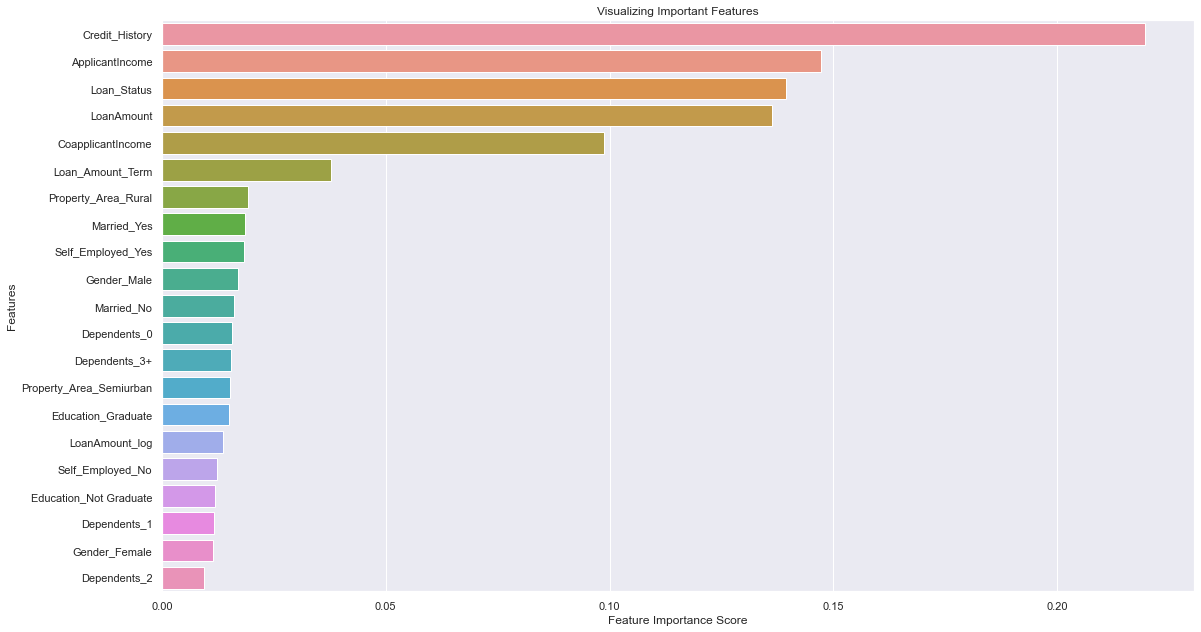

In [63]:

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [64]:
# Thus, we can observe that Credit_history is the most important feature in determing the loan status
# Also, Logistic Regression gives us the best accuracy, followed by RandomForest